In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## 1. Let’s attempt to predict the survival of a horse based on various observed medical conditions. Load the data from ‘horses.csv’ and observe whether it contains missing values.

In [2]:
data = pd.read_csv('horse.csv')

In [3]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
data.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

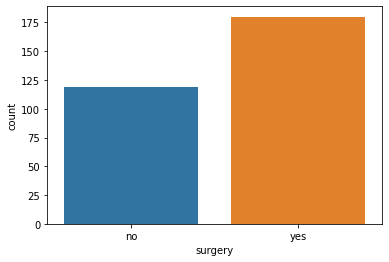

In [5]:
sns.countplot(data['surgery']);

In [6]:
print(data['surgery'].value_counts()/data['surgery'].count())

yes    0.602007
no     0.397993
Name: surgery, dtype: float64


In [7]:
data['cp_data'].value_counts()

no     200
yes     99
Name: cp_data, dtype: int64

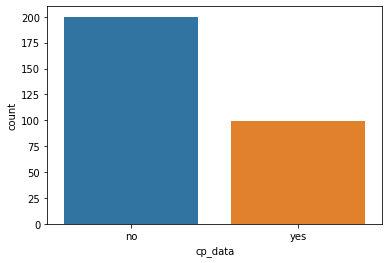

In [8]:
sns.countplot(data['cp_data']);

In [9]:
data['cp_data'].value_counts()/data['cp_data'].count()

no     0.668896
yes    0.331104
Name: cp_data, dtype: float64

## 2. This dataset contains many categorical features, replace them with label encoding.

In [10]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lable_encoder = LabelEncoder()

In [13]:
catgorical_columns = list(data.select_dtypes(['object']).columns)

In [14]:
catgorical_columns

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'outcome',
 'surgical_lesion',
 'cp_data']

In [15]:
data[catgorical_columns] = data[catgorical_columns].apply(LabelEncoder().fit_transform)

In [16]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,6,2,...,45.0,8.4,3,NaN,0,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,4,4,4,1,...,50.0,85.0,1,2.0,1,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,33.0,6.7,3,NaN,2,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,...,48.0,7.2,2,5.3,0,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,4,4,2,2,...,74.0,7.4,3,NaN,0,0,4300,0,0,0


## 3. Replace the missing values by the most frequent value in each column.

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

In [19]:
data.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention       0
nasogastric_tube           0
nasogastric_reflux         0
nasogastric_reflux_ph    246
rectal_exam_feces          0
abdomen                    0
packed_cell_volume        29
total_protein             33
abdomo_appearance          0
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [ ]:
data['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']

In [20]:
imputer = imputer.fit(data[['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']])
data[['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']] = imputer.transform(data[['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']])

In [23]:
data.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [24]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,6,2,...,45.0,8.4,3,3.039604,0,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,4,4,4,1,...,50.0,85.0,1,2.000000,1,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,33.0,6.7,3,3.039604,2,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,...,48.0,7.2,2,5.300000,0,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,4,4,2,2,...,74.0,7.4,3,3.039604,0,0,4300,0,0,0


## 4.Fit a decision tree classifier and observe the accuracy.

In [31]:
X = data.iloc[:, :-1].values

In [32]:
y = data.iloc[:, -1].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=85, test_size=0.25)

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [36]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state=0)

In [39]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred = classifier.predict(X_test)

In [43]:
np.column_stack((y_test, y_pred))

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0,

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[40 10]
 [ 9 16]]


In [46]:
print(accuracy_score(y_test, y_pred))

0.7466666666666667


## 5. Fit a random forest classifier and observe the accuracy

In [48]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier()

In [49]:
RFClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
RD_pred = RFClassifier.predict(X_test)

In [52]:
np.column_stack((y_test, RD_pred))

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0,

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, RD_pred)
cm

array([[44,  6],
       [ 6, 19]], dtype=int64)

In [54]:
print(accuracy_score(y_test, RD_pred))

0.84
